## Descriptive Statistics Visualizations for Variables of Interest

In [ ]:
#import libraries and modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load dmv data 
dmv = pd.read_csv("/content/DMV_GRAD_FINANCE_RACE_CLEAN.csv")
dmv

,Unnamed: 0,NCESSCH,TITLEI,LEAID,G12,SCHOOL_LEVEL,TOTFRL,FTE,STUTERATIO,TOTMENROL,TOTFENROL,PCT_MEN,PCT_FEN,PCT_FRL,SCHOOL_TYPE,STNAM,FIPST,ALL_RATE,ALL_COHORT,MAM_COHORT,MAS_COHORT,MBL_COHORT,MHI_COHORT,MTR_COHORT,MWH_COHORT,CWD_COHORT,ECD_COHORT,FCS_COHORT,HOM_COHORT,LEP_COHORT,Success_Rate,PPCSTOT,MATH_NUM,MATH_PCT,READ_NUM,READ_PCT
0,3268,110003000264,Not Applicable,1100030,85.0,High,-1,21.740000,19.6,254.0,172.0,0.596244,0.596244,0.002347,0,DISTRICT OF COLUMBIA,11,6.0,169,0.0,0.0,80.0,88.0,1.0,0.0,36.0,158.0,9.0,21.0,77.0,0,22406,24.0,20.0,19.000000,20.0
1,3269,110003000267,Not Applicable,1100030,139.0,High,-1,43.500000,14.6,267.0,366.0,0.421801,0.421801,0.001580,1,DISTRICT OF COLUMBIA,11,95.0,143,2.0,3.0,122.0,14.0,2.0,0.0,9.0,57.0,2.0,6.0,5.0,1,22406,185.0,30.0,171.000000,65.0
2,3270,110003000008,Not Applicable,1100030,112.0,High,-1,60.000000,10.8,375.0,270.0,0.581395,0.581395,0.001550,1,DISTRICT OF COLUMBIA,11,60.0,164,0.0,1.0,84.0,77.0,1.0,1.0,29.0,126.0,9.0,26.0,59.0,0,22406,139.0,5.0,136.000000,6.0
3,3271,110003000016,Not Applicable,1100030,110.0,High,-1,4.000000,136.3,171.0,374.0,0.313761,0.313761,0.001835,1,DISTRICT OF COLUMBIA,11,95.0,114,0.0,4.0,86.0,13.0,2.0,9.0,15.0,44.0,4.0,5.0,1.0,1,22406,145.0,15.0,141.000000,55.0
4,3272,110003000055,Not Applicable,1100030,136.0,High,-1,47.000000,9.7,268.0,187.0,0.589011,0.589011,0.002198,1,DISTRICT OF COLUMBIA,11,65.0,180,0.0,0.0,174.0,6.0,0.0,0.0,36.0,137.0,12.0,15.0,1.0,0,22406,98.0,6.0,94.000000,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,15668,510147000524,Not Applicable,5101470,393.0,High,351,118.760002,12.6,733.0,762.0,0.490301,0.490301,0.234783,1,VIRGINIA,51,88.0,389,0.0,5.0,17.0,42.0,17.0,308.0,43.0,84.0,0.0,1.0,10.0,1,12644,698.0,86.0,50.594066,88.0
567,15669,510147000652,Not Applicable,5101470,301.0,High,338,104.169998,12.8,662.0,668.0,0.497744,0.497744,0.254135,1,VIRGINIA,51,91.0,307,0.0,2.0,9.0,23.0,6.0,267.0,42.0,85.0,0.0,8.0,10.0,1,12644,664.0,86.0,50.594066,86.0
568,15670,510405001780,Not Applicable,5104050,292.0,High,674,114.419998,11.5,689.0,631.0,0.521970,0.521970,0.510606,1,VIRGINIA,51,81.0,348,4.0,8.0,44.0,117.0,23.0,152.0,53.0,205.0,2.0,12.0,75.0,1,13787,618.0,83.0,289.000000,75.0
569,17086,510039003009,Not Applicable,5100390,71.0,High,153,25.400000,14.3,194.0,170.0,0.532967,0.532967,0.420330,1,VIRGINIA,51,85.0,75,0.0,0.0,0.0,0.0,4.0,71.0,13.0,32.0,0.0,0.0,0.0,1,10969,93.0,90.0,50.594066,90.0


In [ ]:
#load nys data 
nys = pd.read_csv("/content/NY_GRAD_FINANCE_RACE_CLEAN.csv")
nys

,Unnamed: 0,NCESSCH,TITLEI,LEAID,G12,SCHOOL_LEVEL,TOTFRL,FTE,STUTERATIO,TOTMENROL,TOTFENROL,PCT_MEN,PCT_FEN,PCT_FRL,SCHOOL_TYPE,STNAM,FIPST,ALL_RATE,ALL_COHORT,MAM_COHORT,MAS_COHORT,MBL_COHORT,MHI_COHORT,MTR_COHORT,MWH_COHORT,CWD_COHORT,ECD_COHORT,FCS_COHORT,HOM_COHORT,LEP_COHORT,Success_Rate,PPCSTOT,MATH_NUM,MATH_PCT,READ_NUM,READ_PCT
0,10560,361938005859,Not Applicable,3619380,84.0,High,85,27.020000,11.4,133.0,175.0,0.431818,0.431818,0.275974,1,NEW YORK,36,95.0,78,0.0,1.0,2.0,7.0,3.0,65.0,12.0,25.0,0.0,0.0,0.0,1,28407,40.504172,95.0,50.594066,95.0
1,10561,360585005857,Yes,3605850,135.0,High,585,51.009998,14.3,364.0,366.0,0.498630,0.498630,0.801370,1,NEW YORK,36,50.0,152,3.0,7.0,123.0,12.0,2.0,5.0,34.0,121.0,0.0,5.0,11.0,0,21573,40.504172,70.0,50.594066,70.0
2,10562,360585000297,Yes,3605850,120.0,High,434,67.019997,10.8,219.0,505.0,0.302486,0.302486,0.599448,1,NEW YORK,36,90.0,102,1.0,1.0,63.0,13.0,2.0,22.0,11.0,53.0,0.0,6.0,0.0,1,21573,40.504172,75.0,50.594066,80.0
3,10563,360585000301,Yes,3605850,110.0,High,396,47.009998,10.5,331.0,163.0,0.670040,0.670040,0.801619,0,NEW YORK,36,45.0,143,1.0,7.0,107.0,14.0,3.0,11.0,32.0,111.0,0.0,7.0,5.0,0,21573,40.504172,80.0,50.594066,65.0
4,10564,360585000307,Yes,3605850,97.0,High,400,47.000000,10.2,160.0,320.0,0.333333,0.333333,0.833333,1,NEW YORK,36,80.0,104,0.0,1.0,66.0,14.0,2.0,21.0,27.0,78.0,0.0,2.0,2.0,1,21573,40.504172,85.0,50.594066,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,11185,363012004057,Yes,3630120,220.0,High,631,70.059998,14.2,491.0,505.0,0.492972,0.492972,0.633534,1,NEW YORK,36,76.0,302,1.0,9.0,25.0,23.0,18.0,226.0,64.0,183.0,0.0,1.0,1.0,1,15882,40.504172,85.0,50.594066,90.0
626,16973,361203006337,Yes,3612030,35.0,High,103,23.520000,11.1,142.0,120.0,0.541985,0.541985,0.393130,1,NEW YORK,36,80.0,27,0.0,0.0,0.0,1.0,0.0,26.0,2.0,12.0,0.0,0.0,0.0,1,25222,40.504172,90.0,50.594066,90.0
627,16981,360110703789,Yes,3601107,52.0,High,159,27.010000,10.6,132.0,153.0,0.463158,0.463158,0.557895,1,NEW YORK,36,80.0,37,0.0,0.0,0.0,1.0,0.0,36.0,4.0,21.0,0.0,1.0,0.0,1,23549,40.504172,90.0,50.594066,90.0
628,16983,360108701283,Not Applicable,3601087,149.0,High,382,49.029999,12.5,286.0,328.0,0.465798,0.465798,0.622150,1,NEW YORK,36,75.0,176,1.0,1.0,3.0,1.0,1.0,169.0,32.0,92.0,0.0,1.0,0.0,1,18237,40.504172,90.0,50.594066,90.0


In [ ]:
#load national data
usa = pd.read_csv("/content/NATIONAL_GRAD_FINANCE_RACE_CLEAN.csv", error_bad_lines = False)
usa

,Unnamed: 0,NCESSCH,TITLEI,LEAID,G12,SCHOOL_LEVEL,TOTFRL,FTE,STUTERATIO,TOTMENROL,TOTFENROL,PCT_MEN,PCT_FEN,PCT_FRL,SCHOOL_TYPE,STNAM,FIPST,ALL_RATE,ALL_COHORT,MAM_COHORT,MAS_COHORT,MBL_COHORT,MHI_COHORT,MTR_COHORT,MWH_COHORT,CWD_COHORT,ECD_COHORT,FCS_COHORT,HOM_COHORT,LEP_COHORT,Success_Rate,PPCSTOT,MATH_NUM,MATH_PCT,READ_NUM,READ_PCT
0,0,20061000286,Not Applicable,200610,52.0,High,60,20.299999,11.9,130.0,111.0,0.539419,0.539419,0.248963,1,ALASKA,2,80.0,52,29.0,10.0,0.0,1.0,7.0,5.0,2.0,20.0,0.0,0.0,5.0,1,36416,74.000000,10.000000,75.000000,20.000000
1,1,20039000513,Yes,200390,3.0,High,3,1.000000,9.0,7.0,2.0,0.777778,0.777778,0.333333,0,ALASKA,2,50.0,8,2.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0,17859,1.000000,40.504172,1.000000,50.594066
2,2,20039000079,Yes,200390,42.0,High,52,7.000000,9.9,36.0,33.0,0.521739,0.521739,0.753623,0,ALASKA,2,30.0,39,6.0,2.0,0.0,0.0,9.0,22.0,14.0,16.0,0.0,3.0,0.0,0,17859,2.000000,40.504172,2.000000,50.594066
3,3,20039000081,Yes,200390,15.0,High,28,4.010000,8.5,18.0,16.0,0.529412,0.529412,0.823529,0,ALASKA,2,50.0,10,0.0,0.0,0.0,1.0,2.0,7.0,3.0,6.0,0.0,5.0,0.0,0,17859,7.000000,50.000000,7.000000,50.000000
4,4,20039000158,Not Applicable,200390,94.0,High,124,24.980000,15.6,206.0,183.0,0.529563,0.529563,0.318766,1,ALASKA,2,95.0,87,2.0,0.0,1.0,5.0,8.0,71.0,9.0,25.0,0.0,3.0,0.0,1,17859,90.000000,50.000000,90.000000,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17169,17169,420339007646,Yes,4203390,39.0,High,77,20.790001,8.6,85.0,94.0,0.474860,0.474860,0.430168,1,PENNSYLVANIA,42,90.0,38,0.0,1.0,1.0,0.0,0.0,36.0,7.0,21.0,0.0,1.0,0.0,1,17689,56.000000,80.000000,56.000000,80.000000
17170,17170,420546007651,Not Applicable,4205460,216.0,High,196,74.070000,18.1,687.0,653.0,0.512687,0.512687,0.146269,1,PENNSYLVANIA,42,95.0,225,0.0,7.0,2.0,10.0,1.0,205.0,25.0,50.0,0.0,0.0,1.0,1,12895,208.000000,75.000000,210.000000,70.000000
17171,17171,421758007643,Yes,4217580,58.0,High,130,24.330000,11.5,128.0,151.0,0.458781,0.458781,0.465950,1,PENNSYLVANIA,42,85.0,61,0.0,0.0,0.0,2.0,0.0,59.0,7.0,36.0,1.0,0.0,0.0,1,13871,40.504172,85.000000,50.594066,90.000000
17172,17172,422544007638,Yes,4225440,58.0,High,84,31.889999,9.6,163.0,144.0,0.530945,0.530945,0.273616,1,PENNSYLVANIA,42,80.0,57,0.0,0.0,0.0,0.0,0.0,57.0,9.0,23.0,0.0,0.0,0.0,1,21513,40.504172,50.000000,50.594066,60.000000


### Graduation Rates

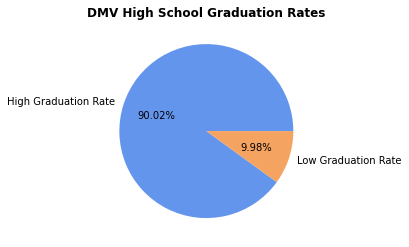

In [ ]:
#pie chart of low vs. high graduation rate schools in the dmv
dmv["Success_Rate"].value_counts().plot(kind='pie', labels = ["High Graduation Rate","Low Graduation Rate"], 
                                   autopct = "%.2f%%", colors = ["cornflowerblue", "sandybrown"])
plt.title("DMV High School Graduation Rates", weight = "bold")
plt.ylabel(None)
plt.show()

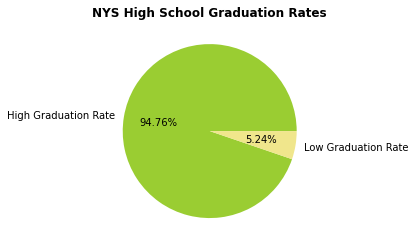

In [ ]:
#pie chart of low vs. high graduation rate schools in ny state
nys["Success_Rate"].value_counts().plot(kind='pie', labels = ["High Graduation Rate","Low Graduation Rate"], 
                                autopct = "%.2f%%", colors = ["yellowgreen", "khaki"])
plt.title("NYS High School Graduation Rates", weight = "bold")
plt.ylabel(None)
plt.show()

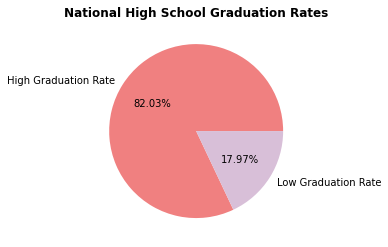

In [ ]:
#pie chart of low vs. high graduation rate schools in usa 
usa["Success_Rate"].value_counts().plot(kind='pie', labels = ["High Graduation Rate","Low Graduation Rate"], 
                                autopct = "%.2f%%", colors = ["lightcoral","thistle"])
plt.title("National High School Graduation Rates", weight = "bold")
plt.ylabel(None)
plt.show()

**Observations**

*   The majority of schools have high graduation rates, regardless of location.
*   The DMV area and New York State have a slightly higher proportion of schools with high graduation rates compared to the entire nation.

### Free and Reduced Lunch

In [ ]:
#initialize empty list
pct_avg = []

In [ ]:
#average free lunch percentage for low graduation rate schools in ny state 
nys_0 = nys.loc[nys["Success_Rate"] == 0]
fr_lg_nys = round(nys_0.PCT_FRL.mean()*100,2)
#fr_lg_nys
pct_avg.append(fr_lg_nys)

In [ ]:
#average free lunch percentage for low graduation rate schools in dmv
dmv_0 = dmv.loc[dmv["Success_Rate"] == 0]
fr_lg_dmv = round(dmv_0.PCT_FRL.mean()*100,2)
#fr_lg_dmv 
pct_avg.append(fr_lg_dmv)

In [ ]:
#average free lunch percentage for high graduation rate schools in ny state 
nys_1 = nys.loc[nys["Success_Rate"] == 1]
fr_hg_nys = round(nys_1.PCT_FRL.mean()*100,2)
#fr_hg_nys
pct_avg.append(fr_hg_nys)

In [ ]:
#average free lunch percentage for high graduation rate schools in dmv
dmv_1 = dmv.loc[dmv["Success_Rate"] == 1]
fr_hg_dmv = round(dmv_1.PCT_FRL.mean()*100,2)
#fr_hg_dmv
pct_avg.append(fr_hg_dmv)

In [ ]:
#create dataframe using list of average free reduced lunch percentages 
data = {'Location':  ["NYS","DMV","NYS","DMV"],
        'Grad rate cat': ["Low","Low","High", "High"],
        'Free reduced lunch %': pct_avg
        }
frl_df = pd.DataFrame(data)
frl_df

,Location,Grad rate cat,Free reduced lunch %
0,NYS,Low,75.24
1,DMV,Low,59.47
2,NYS,High,36.96
3,DMV,High,41.17


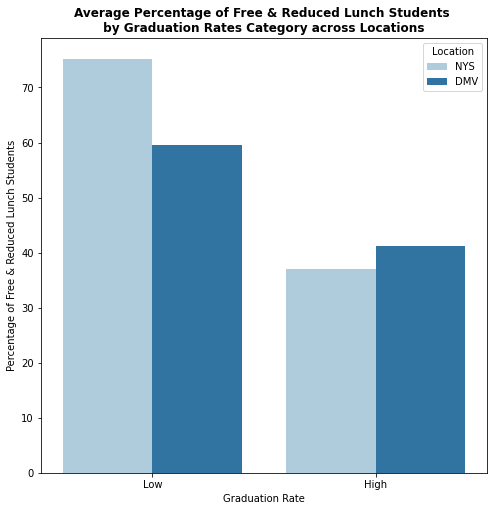

In [ ]:
#bar chart of average percentage of frl students at low vs. high graduation rate schools for all locations
plt.figure(figsize = (8, 8))
b_plot = sb.barplot(x = "Grad rate cat", y = "Free reduced lunch %", hue = "Location",
           data = frl_df, palette = "Paired") 
plt.xlabel("Graduation Rate")
plt.ylabel("Percentage of Free & Reduced Lunch Students")
plt.title("Average Percentage of Free & Reduced Lunch Students \n by Graduation Rates Category across Locations ", weight = "bold")

# b_plot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = "center", 
#                    va = "center", size = 11, xytext = (0, -12), textcoords = 'offset points', color = "k")
plt.show()

**Observations**    
* On average, the percentage of free and reduced lunch students is  much higher for schools with lower graduation rates compared to schools with higher graduation rates, regardless of location.
* The average percentage of free and reduced lunch students in New York schools with low graduation rates exceeds the national average.

### Finances (Total Current Spending Per Pupil & Title I Eligibility)

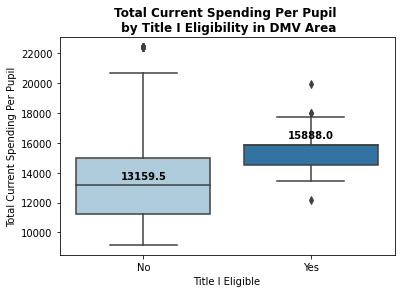

In [ ]:
#boxplot for total current spending per pupil by title eligibility in dmv
box_plot = sb.boxplot(data = dmv, x = "TITLEI", y = "PPCSTOT", palette = "Paired")

medians = dmv.groupby(["TITLEI"])["PPCSTOT"].median()
vertical_offset = dmv["PPCSTOT"].median() * 0.03

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment = "center", size = "medium", color = "k", weight = "bold")
    
labels = ["No", "Yes"]
ax = plt.gca()
ax.set_xticklabels(labels)
ax.ticklabel_format(style = "plain", axis = "y")
plt.xlabel("Title I Eligible")
plt.ylabel("Total Current Spending Per Pupil")
plt.title("Total Current Spending Per Pupil \n by Title I Eligibility in DMV Area", weight = "bold")
plt.show()

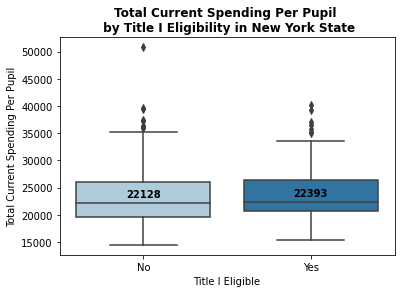

In [ ]:
#boxplot for total current spending per pupil by title eligibility in nys
box_plot = sb.boxplot(data = nys, x = "TITLEI", y = "PPCSTOT", palette = "Paired")

medians = nys.groupby(["TITLEI"])["PPCSTOT"].median()
vertical_offset = nys["PPCSTOT"].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment = "center", size = "medium", color = "k", weight = "bold")
    
labels = ["No", "Yes"]
ax = plt.gca()
ax.set_xticklabels(labels)
ax.ticklabel_format(style = "plain", axis = "y")
plt.xlabel("Title I Eligible")
plt.ylabel("Total Current Spending Per Pupil")
plt.title("Total Current Spending Per Pupil \n by Title I Eligibility in New York State", weight = "bold")
plt.show()

**Observations**
*   More money is spent per student for schools without Title I eligibility, regardless of location. 

### Student Teacher Ratio

In [ ]:
#average student teacher ratio in each location
print(round(dmv["STUTERATIO"].mean(),2))
print(round(nys["STUTERATIO"].mean(),2))
print(round(usa["STUTERATIO"].mean(),2))

15.34
12.78
16.64


In [ ]:
#average student teacher ratio by state dataframe
state_stutea = usa["STUTERATIO"].groupby(usa["STNAM"]).mean()
state_stutea = state_stutea.to_frame()

In [ ]:
#average graduation rate by state dataframe
state_gradrate  = usa["ALL_RATE"].groupby(usa["STNAM"]).mean()
state_gradrate  = state_gradrate.to_frame()

In [ ]:
#crosstab of states and schools in each graduation rate category 
state_crosstab = pd.crosstab(usa["STNAM"],usa["Success_Rate"], margins = False)

In [ ]:
#merge average student teacher ratio by state dataframe and crosstab of states and schools in each graduation rate category 
state_df = state_stutea.join(state_crosstab, on = "STNAM")
state_df.columns = ["Student Teacher Ratio", "Low Graduation Rate","High Graduation Rate"]
state_df["ALL_RATE"] = state_gradrate["ALL_RATE"]
state_df["PCT High_Grad"] = state_df["High Graduation Rate"]/(state_df["Low Graduation Rate"] + state_df["High Graduation Rate"])
state_df["PCT Low_Grad"] = state_df["Low Graduation Rate"]/(state_df["Low Graduation Rate"] + state_df["High Graduation Rate"])
state_df = state_df.sort_values("ALL_RATE")

,Student Teacher Ratio,Low Graduation Rate,High Graduation Rate,ALL_RATE,PCT High_Grad,PCT Low_Grad
STNAM,,,,,,
DISTRICT OF COLUMBIA,18.957895,10,9,62.421053,0.473684,0.526316
NEW MEXICO,16.569620,63,96,66.918346,0.603774,0.396226
NORTH DAKOTA,9.631847,78,79,69.372910,0.503185,0.496815
SOUTH DAKOTA,12.736686,62,107,72.056440,0.633136,0.366864
COLORADO,17.990226,136,263,72.547736,0.659148,0.340852
WASHINGTON,19.984545,146,318,72.757662,0.685345,0.314655
ALASKA,25.436986,26,47,72.952230,0.643836,0.356164
MONTANA,10.278659,75,89,73.110327,0.542683,0.457317
IDAHO,16.917391,52,110,73.376543,0.679012,0.320988


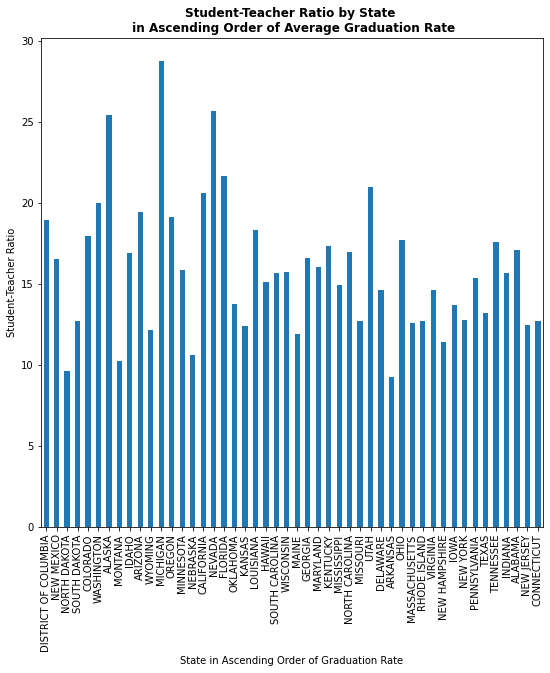

In [ ]:
#student teacher ratio by state in ascending order of average graduation rate
ax = state_df.plot(kind = "bar", y = "Student Teacher Ratio", figsize = (9,9), legend = False)
plt.xlabel("State in Ascending Order of Graduation Rate")
plt.ylabel("Student-Teacher Ratio")
plt.title("Student-Teacher Ratio by State \n in Ascending Order of Average Graduation Rate", weight = "bold")
plt.show()

In [ ]:
state_df["Student Teacher Ratio"].corr(state_df["ALL_RATE"])

-0.27038644679625196

**Observations**  
*   There is a weak negative correlation between student teacher ratio and average graduation rate in schools across the United States, meaning as student teacher ratio increases, the average graduation rate decreases. 

### Gender

In [ ]:
#create percentage of male/female students enrolled in dmv
dmv["MENROL_PCT"] = dmv["TOTMENROL"]/(dmv["TOTFENROL"] + dmv["TOTMENROL"])
dmv["FENROL_PCT"] = dmv["TOTFENROL"]/(dmv["TOTFENROL"] + dmv["TOTMENROL"])

In [ ]:
#create percentage of male/female students enrolled in nys 
nys["MENROL_PCT"] = nys["TOTMENROL"]/(nys["TOTFENROL"] + nys["TOTMENROL"])
nys["FENROL_PCT"] = nys["TOTFENROL"]/(nys["TOTFENROL"] + nys["TOTMENROL"])

In [ ]:
#compute correlation between graduation rate and number of male/female students in dmv
print(dmv["ALL_RATE"].corr(dmv["MENROL_PCT"]))
print(dmv["ALL_RATE"].corr(dmv["FENROL_PCT"]))

-0.3473683835302904
0.3473683835302905


In [ ]:
#compute correlation between graduation rate and number of male/female students in nys
print(nys["ALL_RATE"].corr(nys["MENROL_PCT"]))
print(nys["ALL_RATE"].corr(nys["FENROL_PCT"]))

-0.12079512458501854
0.12079512458501855


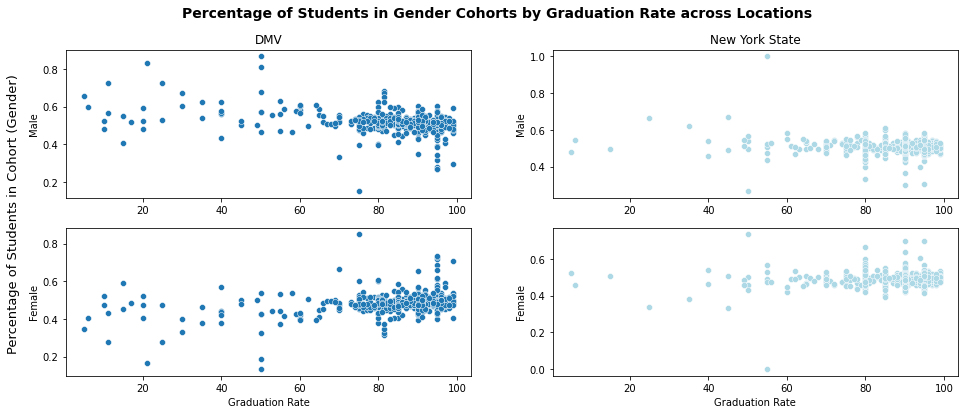

In [ ]:
#sub-scatterplots of number of white v. minority students by graduation rate across locations 
fig, ax = plt.subplots(2,2, figsize=(16,6))

ax1, ax2, ax3, ax4 = ax.flatten()

#dc md va
ax1.set_title("DMV")
sb.scatterplot(x = 'ALL_RATE', y = "MENROL_PCT", data = dmv, ax = ax1, legend = True)
ax1.set_xlabel(None)
ax1.set_ylabel("Male")

sb.scatterplot(x ='ALL_RATE', y = "FENROL_PCT", data = dmv, ax = ax3, legend = True)
ax3.set_xlabel("Graduation Rate")
ax3.set_ylabel("Female")

#new york state 
ax2.set_title("New York State")
sb.scatterplot(x = 'ALL_RATE', y = "MENROL_PCT", data = nys, color = "lightblue", ax = ax2)
ax2.set_xlabel(None)
ax2.set_ylabel("Male")

sb.scatterplot(x ='ALL_RATE', y = "FENROL_PCT", data = nys, color = "lightblue", ax = ax4)
ax4.set_xlabel("Graduation Rate")
ax4.set_ylabel("Female")

fig.text(0.08,0.5, "Percentage of Students in Cohort (Gender)", ha = "center", va = "center", rotation = 90, fontsize = 13)
fig.suptitle("Percentage of Students in Gender Cohorts by Graduation Rate across Locations", fontsize = 14, weight = "bold")

plt.show()

**Observations**

*   There is a negative correlation between graduation rates and percentage of male students in the student cohort, regardless of location.
*   There is a positive correlation between graduation rates and percentage of female students in the student cohort, regardless of location.



### Race

In [ ]:
#create minority cohort category with non-white students
dmv["MIN_COHORT"] = dmv["MAM_COHORT"] + dmv["MAS_COHORT"]+ dmv["MBL_COHORT"] + dmv["MHI_COHORT"] + dmv["MTR_COHORT"]
nys["MIN_COHORT"] = nys["MAM_COHORT"] + nys["MAS_COHORT"]+ nys["MBL_COHORT"] + nys["MHI_COHORT"] + nys["MTR_COHORT"]
usa["MIN_COHORT"] = usa["MAM_COHORT"] + usa["MAS_COHORT"]+ usa["MBL_COHORT"] + usa["MHI_COHORT"] + usa["MTR_COHORT"]

In [ ]:
#compute correlation between graduation rate and number of minority/white students in dmv
print(dmv["ALL_RATE"].corr(dmv["MIN_COHORT"]))
print(dmv["ALL_RATE"].corr(dmv["MWH_COHORT"]))

-0.011484048342822822
0.4986925609975836


In [ ]:
#compute correlation between graduation rate and number of minority/white students in nys
print(nys["ALL_RATE"].corr(nys["MIN_COHORT"]))
print(nys["ALL_RATE"].corr(nys["MWH_COHORT"]))

-0.2027723780107429
0.3670061426447736


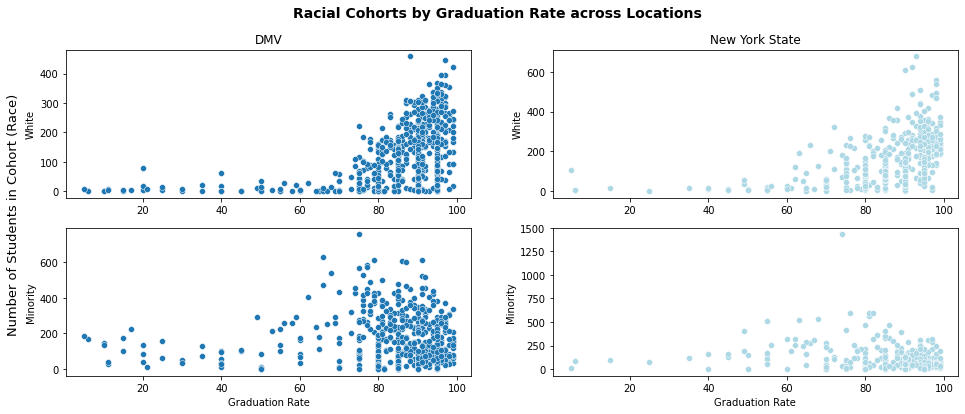

In [ ]:
#sub-scatterplots of number of white v. minority students by graduation rate across locations 
fig, ax = plt.subplots(2,2, figsize=(16,6))

ax1, ax2, ax3, ax4 = ax.flatten()

#dc md va
ax1.set_title("DMV")
sb.scatterplot(x = 'ALL_RATE', y = 'MWH_COHORT', data = dmv, ax = ax1, legend = True)
ax1.set_xlabel(None)
ax1.set_ylabel("White")

sb.scatterplot(x ='ALL_RATE', y = 'MIN_COHORT', data = dmv, ax = ax3, legend = True)
ax3.set_xlabel("Graduation Rate")
ax3.set_ylabel("Minority")

#new york state 
ax2.set_title("New York State")
sb.scatterplot(x = 'ALL_RATE', y = 'MWH_COHORT', data = nys, color = "lightblue", ax = ax2)
ax2.set_xlabel(None)
ax2.set_ylabel("White")

sb.scatterplot(x ='ALL_RATE', y = 'MIN_COHORT', data = nys, color = "lightblue", ax = ax4)
ax4.set_xlabel("Graduation Rate")
ax4.set_ylabel("Minority")

fig.text(0.08,0.5, "Number of Students in Cohort (Race)", ha = "center", va = "center", rotation = 90, fontsize = 13)
fig.suptitle("Racial Cohorts by Graduation Rate across Locations", fontsize = 14, weight = "bold")

plt.show()


**Observations**

*   There is a week negative correlation between graduation rates and number of minority students in the student cohort, regardless of location.
*   There is a moderate positive correlation between graduation rates and number of white students in the student cohort, regardless of location.

